In [109]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='NanumGothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## 레버리지

회귀분석의 t-검정, F-검정은 개별 독립변수, 전체 독립변수가 회귀분석 결과에 영향을 미치는지를 확인하는 작업이다.

레버리지 분석이나 아웃라이어 분석을 통해 개별적인 데이터 표본 하나하나가 회귀분석 결과에 영향을 미치는지를 파악할 수 있다.

> 레버리지(Leverage)는 $y$가 $\hat{y}$에 미치는 영향을 나타내는 값으로 self-influence, self-sensitivity라고도 한다.

$y$는 영향도 행렬 또는 hat행렬이라 부르는 $H$행렬과의 곱으로 $\hat{y}$가 된다.

$$\hat{y}=Hy$$

다음과 같이 $H$행렬과 $y$벡터가 있다고 가정하자.

In [23]:
H = np.array([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]])

y = np.array([[100, 200, 300]]).reshape(3, 1)

H, y

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[100],
        [200],
        [300]]))

$Hy$는 $\hat{y}$이 되는데 이를 수식으로 표현하면 다음과 같다.

In [24]:
y_hat = H @ y
y_hat

array([[1400],
       [3200],
       [5000]])

$\hat{y}$는 $H$행렬을 행벡터로 쪼개 $y$벡터와의 내적으로 $\hat{y}$의 값이 된다.

$$\hat{y}_i = h_{i1} y_1 + h_{i2} y_2 + \cdots + h_{ii} y_i + \cdots + h_{iN} y_N$$

In [25]:
H[0,0] * y[0] + H[0,1] * y[1] + H[0,2] * y[2]

array([1400])

In [26]:
H[1,0] * y[0] + H[1,1] * y[1] + H[1,2] * y[2]

array([3200])

In [27]:
H[2,0] * y[0] + H[2,1] * y[1] + H[2,2] * y[2]

array([5000])

여기서 첫번째 $\hat{y}_1$의 값에 영향을 주는 $H$행렬의 원소는 $H_{11}$이 된다.

두번째 $\hat{y}$의 값에 영향을 주는 원소는 $H_{22}$이다.

즉, $H$행렬의 대각성분이 레버리지이며 실제 결과값 $y$가 예측값 $\hat{y}$에 미치는 영향, 예측점을 자기 자신의 위치로 끌어 당기는 정도를 나타낸다.

만약 $H_{ii}$번째 원소의 값이 1이고 비대각 성분들은 모두 0이라면 모든 $y$값과 $\hat{y}$값이 일치한다.

In [32]:
H = np.eye(3)

H @ y

array([[100.],
       [200.],
       [300.]])

하지만 현실적으로 이런 경우가 발생한 가능성은 없다고 봐도 무방하다. 따라서 레버리지값은 다음의 특징을 가진다.

1. 레버리지는 1보다 같거나 작은 양수 혹은 0이다.

2. 레버리지의 합은 모형에 사용된 모수의 갯수 $K$와 같다. (상수항 포함, 1차원 모형의 $K=2$)

$$tr(H) = \sum^N_ih_{ii} = K$$

2번 특징에서 레버리지의 합은 모형의 사용된 모수의 갯수 $K$와 동일하다고 했는데 현실적으로 대각성분이 모두 1이 될 확률은 불가능하기 때문에 데이터의 수 $N$이 $K$를 나누어 가지는 식이 된다.

$$h_{ii} \approx \dfrac{K}{N}$$

일반적으로 이렇게 구해진 레버리지의 평균값보다 2 ~ 4배 이상으로 크면 해당 데이터의 레버리지가 크다고 판단한다.

## statsmodels를 이용한 레버리지 계산

sklearn의 `make_regression()`메소드를 이용해 독립변수가 하나이고 noise가 20인 샘플 100개를 생성한다.

추가적으로 2개의 임의의 데이터를 생성한다.

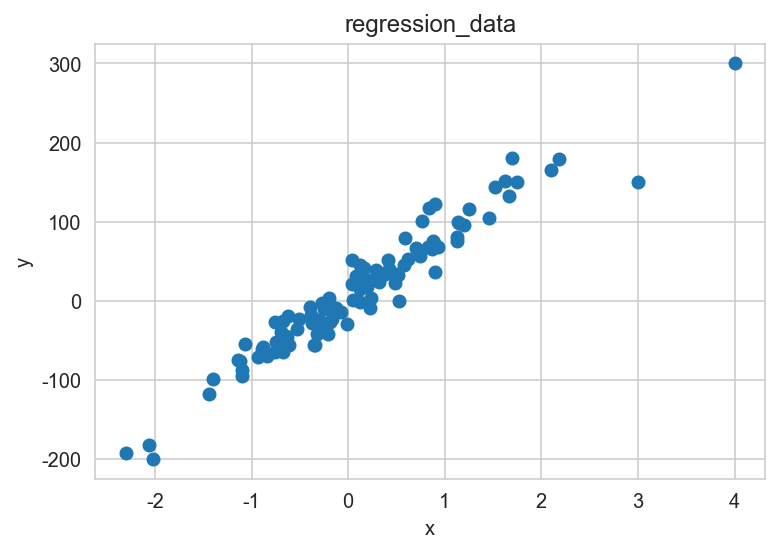

In [44]:
from sklearn.datasets import make_regression
import statsmodels.api as sm

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

data_100 = (4, 300)
data_101 = (3, 150)

X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression_data")
plt.show()

In [45]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           1.61e-61
Time:                        18:49:07   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

선형회귀 결과 객체에 get_influence() 메소드는 영향도 정보 객체를 반환한다.
이 영향도 정보 객체의 hat_matrix_diag 속성을 이용해 레버리지 벡터를 추출할 수 있다.

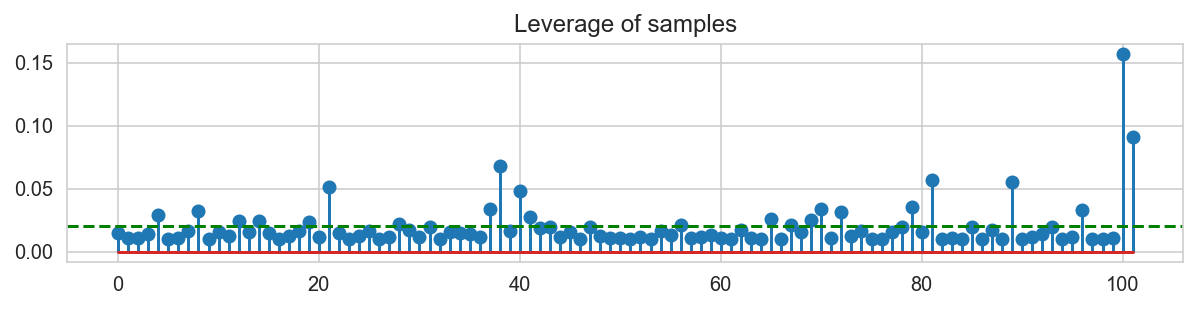

In [61]:
# 영향도 정보 객체
influence = result.get_influence()

# 레버리지 벡터
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c='g', ls='--')
plt.title('Leverage of samples')
plt.show()

위 stem plot의 결과를 보면 앞서 임의로 생성한 두개의 데이터를 제외하고는 대부분의 데이터는 레버리지 값이 0.02 근처의 낮은 값을 가지는 것을 확인할 수 있다.

레버리지 평균은 $\dfrac{K}{N}$이므로 $\dfrac{2}{102} \approx 2$이기에 위의 결과가 나타난 것이다.

In [67]:
# 레버리지 평균

2 / 102

0.0196078431372549

레버리지의 성질 중 또 하나는 레버리지의 합은 $K$와 같다는 것이었다.

In [68]:
np.sum(hat)

2.0000000000000004

위 레버리지 시각화 결과에서 레버리지 값이 0.05 이상인 데이터만을 추출해 따로 시각화한 결과이다.

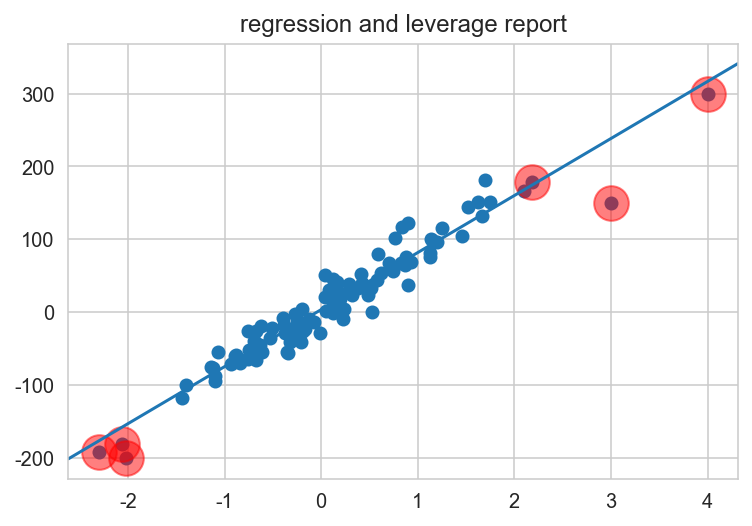

In [76]:
ax = plt.subplot()

plt.scatter(X0, y)
sm.graphics.abline_plot(model_results = result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c='r', alpha=0.5)
plt.title('regression and leverage report')
plt.show()

위의 결과를 확인해보면 레버리지가 큰 데이터들은 주로 무리지어있지 않고 단독으로 존재하는 데이터인 것을 확인할 수 있다.

## 레버리지의 영향

회귀분석 예제용 데이터 102개 중 마지막 데이터를 제외하고 회귀분석을 진행한 결과와 원래의 회귀분석 결과를 비교해보자.

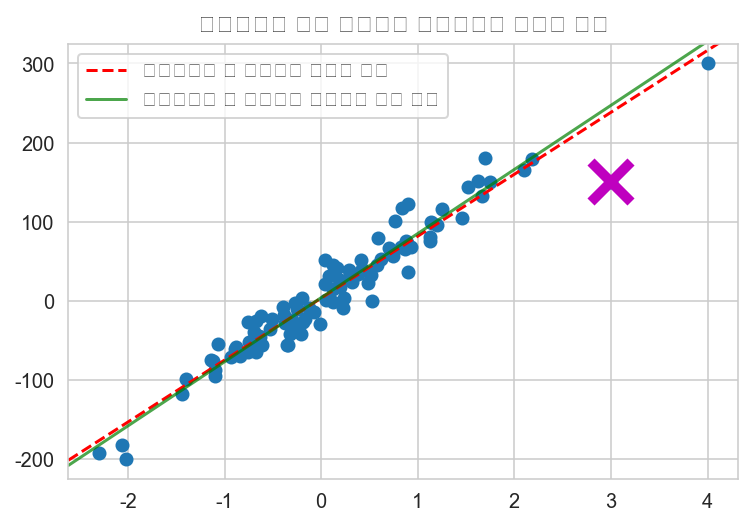

In [95]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result2,
                        c="g", alpha=0.7, ax=ax)


plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 큰 데이터를 포함한 경우", u"레버리지가 큰 데이터를 포함하지 않은 경우"],
           loc="upper left")
plt.title("레버리지가 높은 데이터가 회귀분석에 미치는 영향")
plt.show()

레버리지가 큰 102번째 데이터를 제외하고 회귀분석을 진행한 결과 데이터 하나만을 제외하고 회귀분석을 진행했음에도 불구하고 회귀선이 달라질만큼 회귀분석에 큰 영향을 주는 것을 확인할 수 있다.

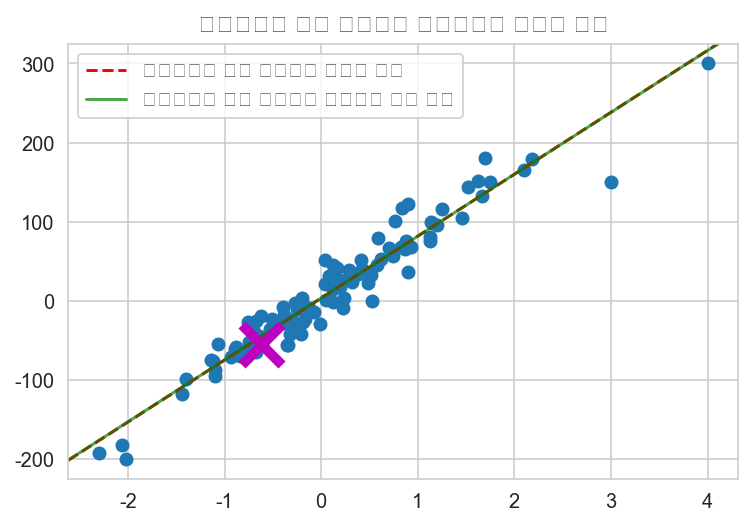

In [96]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result3,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 작은 데이터를 포함한 경우", u"레버리지가 작은 데이터를 포함하지 않은 경우"],
           loc="upper left")
plt.title("레버리지가 작은 데이터가 회귀분석에 미치는 영향")
plt.show()

이번엔 레버리지가 작은 데이터를 제외하고 회귀분석을 진행한 결과 회귀분석에 큰 영향을 주지 않는 것을 확인할 수 있다.

그렇다면 레버리지가 큰 데이터를 제외하고 회귀분석을 진행하면 회귀분석에 큰 영향을 미치는 것일까?

이번에는 레버리지는 크지만 잔차가 작은 회귀식을 잘 따르는 데이터를 제외하고 회귀분석을 진행해보았다.

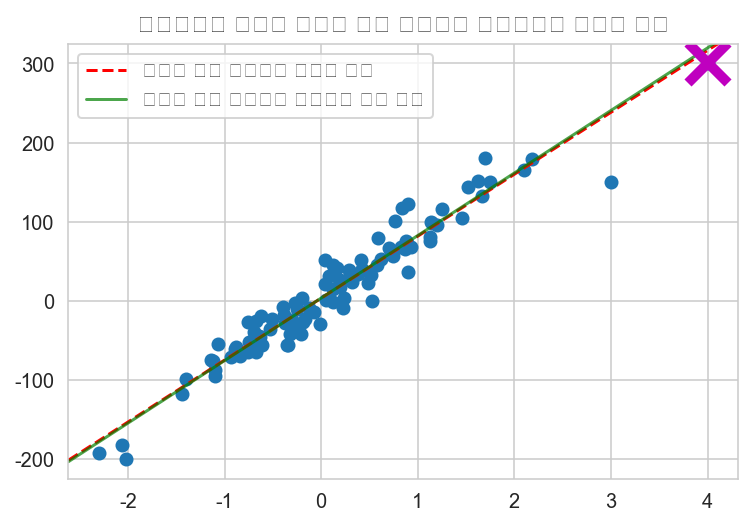

In [97]:
idx = np.array(list(range(100)) + [101])
model4 = sm.OLS(y[idx], X[idx, :])
result4 = model4.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result4,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-2], y[-2], marker='x', c="m", ms=20, mew=5)
plt.legend([u"오차가 작은 데이터를 포함한 경우", u"오차가 작은 데이터를 포함하지 않은 경우"],
           loc="upper left")
plt.title("레버리지는 높지만 오차가 작은 데이터가 회귀분석에 미치는 영향")
plt.show()

그 결과 레버리지가 큰 데이터였음에도 회귀분석에 큰 영향을 미치지는 않았다.

> 즉, 레버리지가 크더라도 잔차가 작다면 그 데이터는 포함하지 않더라도 회귀분석에 큰 영향을 주지 않는다. 하지만 레버리지와 잔차가 모두 높은 값을 가질 경우 그 데이터는 회귀분석에 큰 영향을 미치는 데이터로 회귀분석에 포함할지 포함하지 않을지를 신중하게 고려해야한다.

## 아웃라이어

아웃라이어는 회귀 모델의 설명과 동떨어진 값을 갖는 데이터로 잔차가 크다는 특징을 갖는다.

잔차는 다음과 같이 표현할 수 있다.

$$\text{Var}[e_i] = \sigma^2 (1 - h_{ii})$$

위 식에서 $\sigma$는 disturbance(잡음)의 폭을 의미한다.

그런데 확률론적 선형회귀 모형의 가정에 따르면 모든 데이터에 대해 이 잡음의 폭은 동일하므로 잔차는 레버리지에 의해 달라지는 것이다.

따라서 실제로는 구할 수 없는 $\sigma$ 대신 $s$(잔차분산)를 이용해 다음과 같이 표준화된 잔차를 구할 수 있다.

$$r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}}$$

따라서 아웃라이어를 판단할 때는 일반적인 잔차를 기준으로 하는 것이 아닌 표준화된 잔차를 이용해서 판단해야한다.

우선 일반적인 데이터의 잔차를 확인하면 다음과 같다.

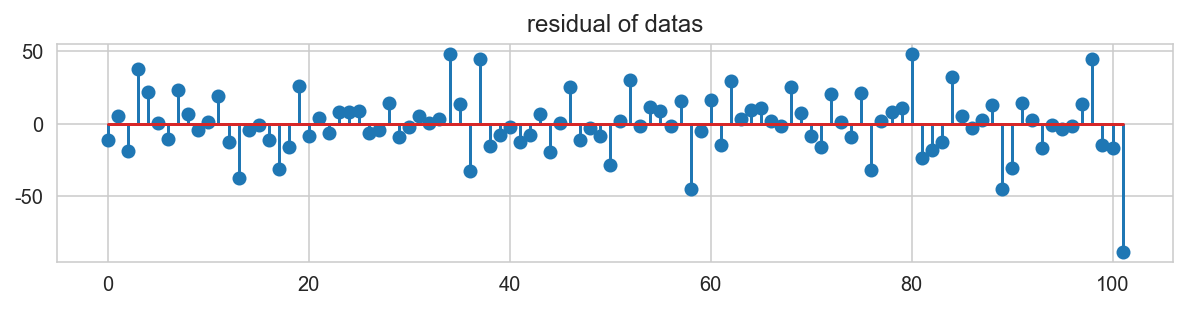

In [128]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.title("residual of datas")
plt.show()

result객체의 `resid_pearson` 속성을 이용해 표준화된 잔차를 확인할 수 있다.

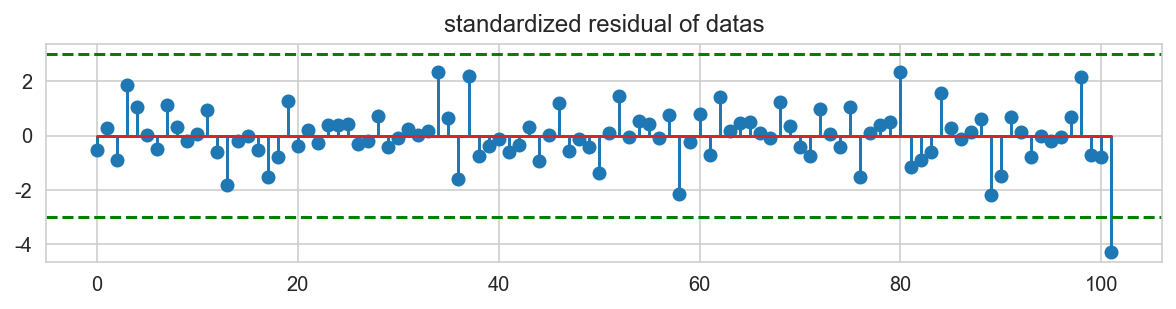

In [130]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("standardized residual of datas")
plt.show()

## Cook's Distance

회귀분석에서 잔차의 크기가 큰 데이터가 아웃라이어이다. 그 중에서도 잔차와 레버리지가 모두 큰 데이터가 집중해야하는 데이터들이기 때문에 잔차와 레버리지를 동시에 보기위한 기준인 Cook's Distance를 이용할 수 있다.

Cook's Distance는 레버리지나 잔차의 크기가 커지면 그 값이 커지는 특징이 있다.

$$D_i = \frac{r_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right]$$

Fox' Outlier Recommendation은 Cook's Distance가 아래의 기준값보다 클 때 아웃리어어로 판단한다.

$$D_i > \dfrac{4}{N − K - 1}$$

모든 데이터의 레버리지와 잔차를 동시에 보기 위해 `plot_leverage_resid2` 메소드를 이용한다.

X축이 표준화된 잔차, Y축이 leverage를 나타내며 주목해야하는 잔차나 레버리지가 큰 데이터들은 index번호가 찍혀서 출력된다.

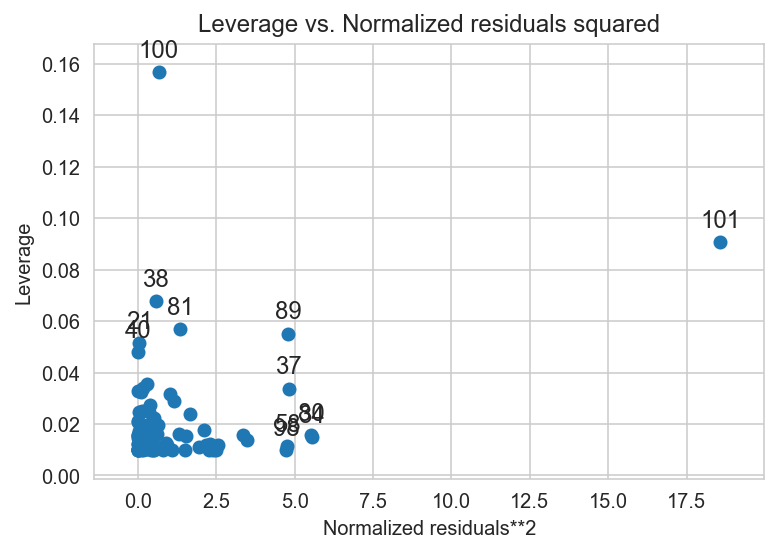

In [133]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

`influence_plot`을 이용하면 Cook's Distance를 버블로 시각화한다.

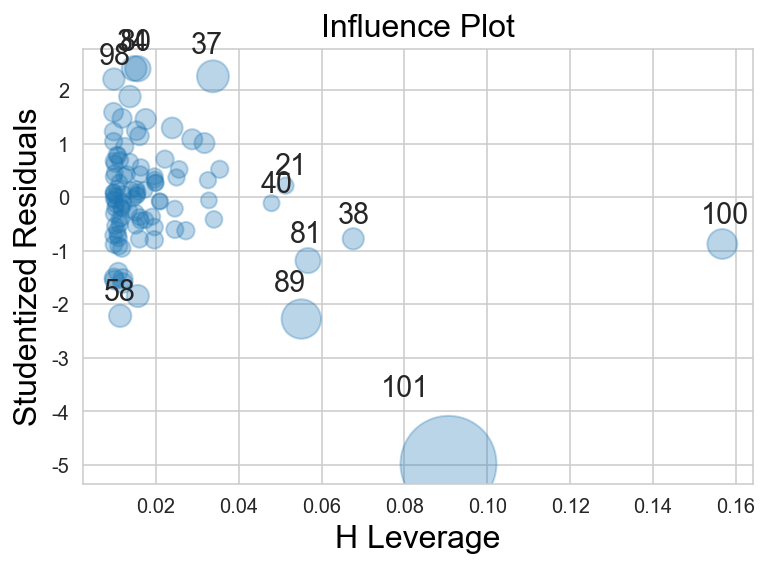

In [134]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

Fox' Recommendation를 기준으로 아웃라이어를 선택하면 다음과 같다.

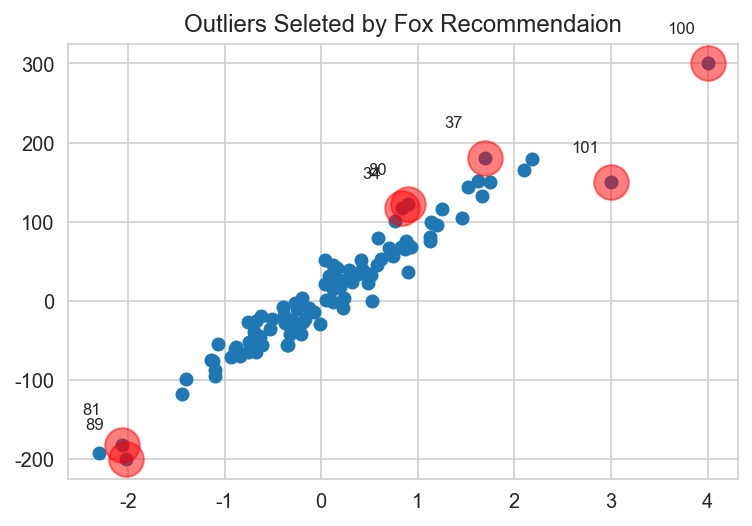

In [136]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(X0[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("Outliers Seleted by Fox Recommendaion")
plt.show()

## 보스턴 데이터 아웃라이어

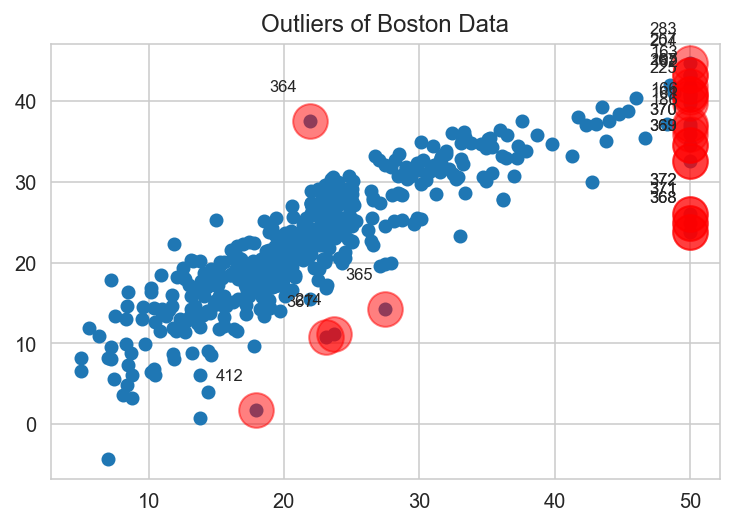

In [139]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

influence_boston = result_boston.get_influence()
cooks_d2, pvals = influence_boston.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

# MEDV = 50 제거
idx = np.hstack([idx, np.where(boston.target == 50)[0]])

ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.MEDV[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(dfy.MEDV[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("Outliers of Boston Data")
plt.show()

In [138]:
idx2 = list(set(range(len(dfX))).difference(idx))
dfX = dfX.iloc[idx2, :].reset_index(drop=True)
dfy = dfy.iloc[idx2, :].reset_index(drop=True)
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     156.1
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          2.41e-161
Time:                        21:11:22   Log-Likelihood:                -1285.2
No. Observations:                 485   AIC:                             2598.
Df Residuals:                     471   BIC:                             2657.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8999      4.107      4.602      0.0